**Güzide Nur Demir**
guzidedemir@std.sehir.edu.tr

# EECS 461/ECE 523  | Assignment 2

In [1]:
import pandas as pd
import numpy as np

## DATA PREPARATION & VISUALIZATION 

In [2]:
class_labels = [
    "T-shirt/top",#0
    "Trouser",#1
    "Pullover",#2
    "Dress",#3
    "Coat",#4
    "Sandal",#5
    "Shirt",#6
    "Sneaker",#7
    "Bag",#8
    "Ankle boot"#9
]

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### a)  Split the data into X and y:

In [4]:
train_x_a = train.drop("label", axis=1)
train_y = train["label"].copy()
test_x = test.drop("label", axis=1)
test_y = test["label"].copy()

In [5]:
train_y_unique = train_y.unique() #Get unique values in label column
train_y_unique

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

### b)  Visualizing the data:

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
def plot_image(row):
    """
    This method plot given rows of pixels as 28x28 image by using numpy & matplotlib.
    """
    image = np.array(row).reshape(28,28) # Resizes given pixel information
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

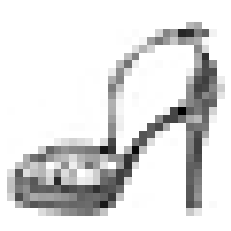

In [8]:
plot_image(train_x_a.iloc[[30]]) # Plot image of 30th row

### c) Class visualization:

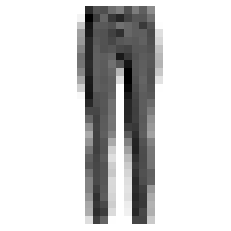

In [9]:
def plot_instances(train_set, y):
    """
    This method plots images of 3 instances from each label in the given dataframe.
    Train_set contains pixels while y contains class labels.
    """
    for label in y:
        filtered_df = train_set.loc[train_set['label'] == label] # Filter according to label
        three_rows_df = filtered_df.iloc[:3] # Get 3 rows 
        dropped_df = three_rows_df.drop(columns=['label']) # Remove column for label info
        for i, row in dropped_df.iterrows(): # Plot each row
            plot_image(row)
            
plot_instances(train, train_y_unique)

### d) Average visualization:

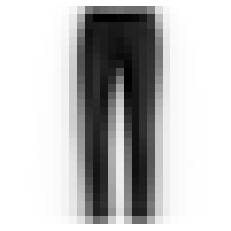

In [10]:
def plot_means(train_set, y):
    """
    This method plots images of means of each label in the given dataframe.
    As in the above method, train_set contains pixels and y contains class labels.
    """
    for label in y:
        filtered_df = train_set.loc[train_set['label'] == label]
        dropped_df = filtered_df.drop(columns=['label'])
        mean_df = dropped_df.mean(axis=0) # Get mean by columns
        plot_image(mean_df)
        
plot_means(train, train_y_unique)

## BINARY CLASSIFICATION

### e) Binary transformation:

In [11]:
filtered_label_1 = train.loc[train['label'].isin([0,1,2,3,4,6])] 
#filter train dataframe, set label 1 if they are in clothing items
filtered_label_1['label'] = 1

filtered_label_0 = train.loc[train['label'].isin([5,7,8,9])]
filtered_label_0['label'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
train_y_e = filtered_label_1.append(filtered_label_0, ignore_index=True) #Merge two labeled train dataframes into one
train_y_e = train_y_e['label'] #Get only label column
train_y_e

0        1
1        1
2        1
3        1
4        1
        ..
29996    0
29997    0
29998    0
29999    0
30000    0
Name: label, Length: 30001, dtype: int64

In [13]:
filtered_label_test1 = test.loc[test['label'].isin([0,1,2,3,4,6])] 
filtered_label_test1['label'] = 1
#Filter test dataframe, set label 1 if they are in clothing items

filtered_label_test0 = test.loc[test['label'].isin([5,7,8,9])]
filtered_label_test0['label'] = 0

test_y_f = filtered_label_test1.append(filtered_label_test0, ignore_index=True) #append two labeled test dataframes into one
test_y_f = test_y_f['label']
test_y_f

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       1
1       1
2       1
3       1
4       1
       ..
4996    0
4997    0
4998    0
4999    0
5000    0
Name: label, Length: 5001, dtype: int64

### f) Binary Classification Model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [15]:
# create model, train it and perform 5 fold cross validation.
logistic_reg = LogisticRegression(random_state=0) #create logistic Regression model
logistic_reg.fit(train_x_a, train_y_e) #fit the model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
mean_accuracy = cross_val_score(logistic_reg, train_x_a, train_y_e, cv=5, scoring="accuracy").mean() 
#Compute mean accuracy by using cross validation 
print(mean_accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### g) Predict test data:

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, accuracy_score, f1_score

In [ ]:
# the model
prediction = logistic_reg.predict(test_x) #Couldn't train it again due to memory error...
# confusion matrix
confusion = confusion_matrix(test_y_f, prediction)
print(confusion)
# accuracy, precision, recall, f1_score
accuracy = accuracy_score(test_y_f, prediction)
precision = precision_score(test_y_f, prediction)
recall = recall_score(test_y_f, prediction)
f1 = f1_score(test_y_f, prediction)
print(accuracy, precision, recall, f1)

### h) Model evaluation:


In [24]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

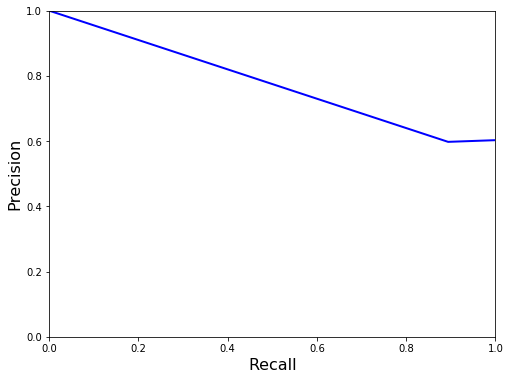

In [27]:
# precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(test_y_f, prediction) #define precision, recall and threshold

def plot_precision_vs_recall(precisions, recalls): #plot the precision recall curve as being in the book
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16) 
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

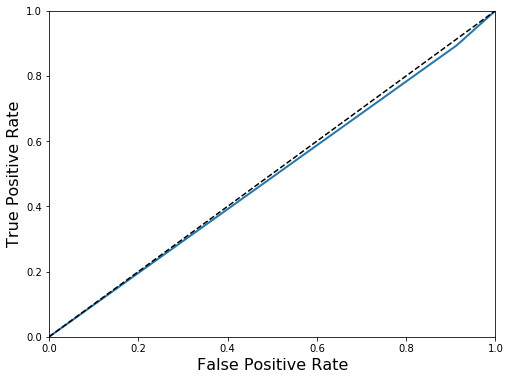

In [29]:
# ROC curve
fpr, tpr, thresholds = roc_curve(test_y_f, prediction) #define the parameters of roc curve
def plot_roc_curve(fpr, tpr, label=None): #plot the roc curve with false positive and true positive rates
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [31]:
# AUC score
auc_score = roc_auc_score(test_y_f, prediction) #compute the area under the roc curve
print(auc_score)

0.49023512848647


### i) Learning curves:

In [32]:
# learning curve

# TODO

## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

### j) Training and cross validating logistic regression:

In [ ]:
# 3 fold Cross Validation on train_x_a and train_y
cross_val = cross_val_score(logistic_reg, train_x_a, train_y, cv=3, scoring="accuracy")
mean_cross_val_accuracy = cross_val.mean() #mean of the accuracy
print(mean_cross_val_accuracy)

### k) Testing logistic regression:

In [ ]:
# fit a new model
logistic_reg_2 = LogisticRegression(random_state=0)
logistic_reg_2.fit(train_x_a, train_y)
# test model
test_accuracy = logistic_reg_2.score(test_x, test_y)
# confusion matrix
prediction_2 = logistic_reg_2.predict(test_x)
conf_matrix = confusion_matrix(test_y, prediction_2)
print(conf_matrix)

## MULTICLASS CLASSIFICATION USING SVR

### l) Grid search to find best model:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
svc_estimator = SVC(gamma='auto') #Create SVC model
grid = [
  {'C': [0.1, 0.5, 1, 5, 10 ], 'kernel': ['linear', 'rbf', 'poly'],
   'tol': [0.000, 0.001, 0.1], 'decision_function_shape':['ovo', 'ovr']} #Define grid parameters
 ]
grid_search = GridSearchCV(estimator=svc_estimator, param_grid=grid, cv=5) #Create GridSearch model with SVC model
grid_search.fit(train_x_a, train_y)

best_parameter = grid_search.best_params_ #Take the best parameters by using grid search
print(best_parameter)
best_accuracy = grid_search.best_score_ #Take the best accuracy score by using grid search
print(best_accuracy)

### m) Testing the best model:

In [ ]:
#Could not select find the best parameters because of the memory error that I got from part g.
svc_best = SVC(tol=, 
               C=, 
               kernel=, 
               decision_function_shape=) #Best parameters determined by GridSearchCV are selected
svc_best.fit(train_x_a, train_y)
test_accuracy_best = svc_best.score(test_x, test_y) #take the best test accuracy
print(test_accuracy_best)
prediction_best = svc_best.predict(test_x) 
confusion_matrix_best = confusion_matrix(test_y, prediction_best) #create confision matrix
print(confusion_matrix_best)

## MULTICLASS CLASSIFICATION USING DECISION TREES

### n) Grid Search to find best model:

In [ ]:
from sklearn import tree

In [ ]:
decision_tree = tree.DecisionTreeClassifier() #Create Decision Tree model
decision_tree.fit(train_x_a, train_y)
grid_tree = [
  {'max_depth': [2, 4, 10], 'min_samples_split': [2, 3, 4]} #Define grid parameters
 ]

grid_search_tree = GridSearchCv(estimator=decision_tree, param_grid=grid_tree, cv=5) #Use Grid Search model usin decision tree model
grid_search_tree.fit(train_x_a, train_y)
tree_param =  grid_search_tree.best_params_ #take the best parameters from the model
print(tree_param)
tree_accuracy = grid_search_tree.best_score_ #take the best accuracy score from the model
print(tree_accuracy)

### o) Testing the best model:

In [6]:
# test accuracy
tree_best = tree.DecisionTreeClassifier(max_depth=, 
                                        min_samples_split=) #Train the new model with best parameters that I could not found because of the memory issue.
tree_best.fit(train_x_a, train_y)
test_accuracy = tree_best.score(test_x, test_y) #take the best accuracy using test set.
print(test_accuracy)

# confusion matrix
tree_prediction = tree_best.predict(test_x)
tree_conf_matrix_best = tree_best.confusion_matrix(test_y, tree_prediction) #compute the confision matrix using test set
print(tree_conf_matrix_best)